In [1]:
import pandas as pd
import scipy.stats as stats
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib 
from matplotlib.animation import FuncAnimation
from bokeh.plotting import figure, show, output_notebook, output_file, reset_output, save
from bokeh.layouts import gridplot, row, column
from bokeh.models import Range1d
output_notebook()

Loading BokehJS ...

# Functions for various uses

### Function to import data from each user solution to be called later and stored in datasets

In [2]:
#function to import data from each user solution to be called later and stored in datasets
h_max=7
def stat(file_GeoI,sol_file):
    save_data_real = pd.read_csv(file_GeoI  + '\\'+'Data_real.csv')#save_data_real.csv 
    save_data_obf = pd.read_csv(file_GeoI + '\\'+'Data_GeoI.csv') 
    horizons = pd.read_csv(sol_file  + '\\'+'horizons.csv') 
    horizons = horizons['0'].tolist()
    
    x_real = save_data_real['x'].to_numpy()
    y_real = save_data_real['y'].to_numpy()
    x_GeoI = save_data_obf['x'].to_numpy()
    y_GeoI = save_data_obf['y'].to_numpy()
    
    b = save_data_real['b'].to_numpy()[0:len(x_real)-h_max]
    
    priv_real = save_data_real['priv'].to_numpy()[0:len(x_real)-h_max]
    priv_obf = save_data_obf['priv'].to_numpy()[0:len(x_real)-h_max]
    util_obf = save_data_obf['util'].to_numpy()[0:len(x_real)-h_max]

    x_realf = x_real[0:len(x_real)-h_max]
    y_realf = y_real[0:len(x_real)-h_max]
    x_GeoIf = x_GeoI[0:len(x_real)-h_max]
    y_GeoIf = y_GeoI[0:len(x_real)-h_max]


    priv_mpc = {} 
    util_mpc = {}
    
    x_mpc= {}
    y_mpc = {}
    Time_mpc = {}

    for h in horizons:
        temp_mpc = pd.read_csv(sol_file  + '\\'+'save_data_mpc_horizon_' + str(h) + '.csv')
        priv_mpc[h] = temp_mpc.priv[0:len(x_real)-h_max]
        util_mpc[h] = temp_mpc.util[0:len(x_real)-h_max]
        x_mpc[h] = temp_mpc.x[0:len(x_real)-h_max]
        y_mpc[h] = temp_mpc.y[0:len(x_real)-h_max]
        Time_mpc[h] = temp_mpc['time'][0:len(x_real)-h_max]


    return horizons, b, priv_real, priv_obf, priv_mpc,x_realf,y_realf, x_GeoIf, y_GeoIf, x_mpc, y_mpc, Time_mpc, util_mpc, util_obf


# Importing Data

In [3]:
#importing all solutions to store them in desired dictionaries and dataframes for multiple users

list_value_mpc_priv = []
list_value_mpc_util = []
priv_mpc_all = {}
b_all = []
x_GeoI_all = []
y_GeoI_all =  []
Runtime = {}
y_mpc_all = {}
x_mpc_all = {}
priv_list_real = []
priv_user = {}
util_user = {}
priv_list_obf =[]
NT_b=[]
dataset='privamov'
users = os.listdir("datasets/"+dataset+"-tree")
current_path = "solutions\\privamov_27072023"
#current_path = "solutions\\cabspotting_10112023"
GeoI_path=current_path + '\\GeoI2\\' 
file_case='FLAIR2'

for user_n in users: #looping over solutions 
    user= user_n.replace('.csv','')
    sol_file = "sol_" + str(user) 
    local_sol_file = current_path + '\\'+file_case+'\\'  + sol_file
    GeoI_file = GeoI_path  + sol_file
    exists = os.path.isdir(local_sol_file)
    if exists:
        #print('ox')
        horizons,b, priv_real, priv_obf, priv_mpc, x_realf,y_realf, x_GeoIf, y_GeoIf, x_mpc, y_mpc, Time_mpc, util_mpc, util_obf = stat(GeoI_file,local_sol_file)
        
        if np.sum(b)<7:
            continue
        
        priv_list_real.extend(priv_real)
        #priv_user, util_user, etc. are dictionaries 
        #with each key value pair representing a user and the solution data respectively
        
        priv_user[user] = pd.DataFrame(priv_real, columns = ['priv_real']) 
        priv_user[user]['priv_GeoI'] = priv_obf
        priv_user[user]['b'] = b
        NT_b+=[np.sum(b)]
        priv_user[user]['disc_time']=np.arange(0,30*len(b),30)
        priv_user[user]['x_real']=x_realf
        priv_user[user]['y_real']=y_realf
        priv_user[user]['x_GeoI']=x_GeoIf
        priv_user[user]['y_GeoI']=y_GeoIf
        
        util_user[user] = pd.DataFrame(util_obf, columns = ['util_GeoI'])
        b_all.extend(b)
        
        ##Geo-I unique list
        priv_list_obf.extend(priv_obf)
        x_GeoI_all.extend(x_GeoIf.tolist())
        y_GeoI_all.extend(y_GeoIf.tolist())
        
        for h in horizons:
            if user == users[0].replace('.csv',''):
                priv_mpc_all[h] = []
                x_mpc_all[h] = []
                y_mpc_all[h] = []
                Runtime[h] = []   
            if np.sum(b)>=h_max:
                priv_mpc_all[h].extend(priv_mpc[h].tolist()) 
                x_mpc_all[h].extend(x_mpc[h].tolist())
                y_mpc_all[h].extend(y_mpc[h].tolist())
                Runtime[h].extend(Time_mpc[h].tolist())
            
            priv_user[user][h] = priv_mpc[h]
            priv_user[user]['x_'+str(h)] = x_mpc[h]
            priv_user[user]['y_'+str(h)] = y_mpc[h]
            util_user[user][h] = util_mpc[h]
    else:
        print('ox')
            



ox
ox
ox
ox


## Save solution in a single dataframe

In [4]:
df = pd.DataFrame(priv_mpc_all) # df on the other hand is a dataframe which contains all the data for all the users concatinated
df['priv_GeoI'] = priv_list_obf[0:len(df[1])]
df['priv_real'] = priv_list_real[0:len(df[1])]
df['b'] = b_all[0:len(df[1])]


## Data set

In [5]:
print('mean of trasmitted pos for user:',np.mean(NT_b))
print('min of trasmitted pos for user:',np.min(NT_b))
print('max of trasmitted pos for user:',np.max(NT_b))

mean of trasmitted pos for user: 288.92391304347825
min of trasmitted pos for user: 8
max of trasmitted pos for user: 660


In [6]:
NT_bpos=[NT_b[i] for i in range(len(NT_b)) if NT_b[i]>0]
NT_bsta=[NT_b[i] for i in range(len(NT_b)) if (NT_b[i]>=7)]
print(len(NT_bpos))
print(len(NT_bsta))

92
92


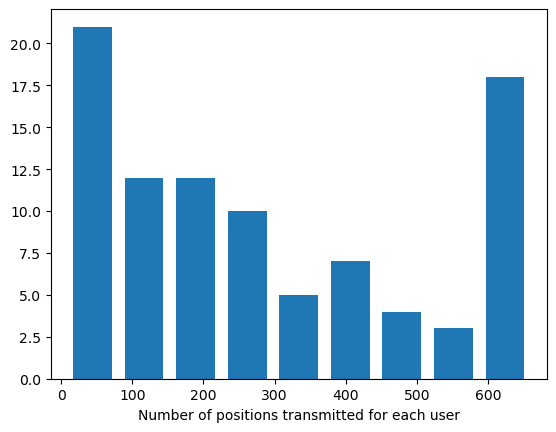

In [7]:
plt.figure()
plt.hist(NT_bsta,bins=9,rwidth=0.75)
plt.xlabel('Number of positions transmitted for each user')
tikzplotlib.save(GeoI_path + 'Transmitted_points.tex')
plt.show()

#  means of each user solution

### calculating mean of each user

In [8]:
#calculating mean of each each solution 
means_priv_user = {}
means_real_priv_user =[]
for i in users:
    i=i.replace('.csv','')
    if i in priv_user:
        means_priv_user[i] = priv_user[i].loc[priv_user[i].b>0].mean()
        means_real_priv_user+=[means_priv_user[i].priv_real]
means_util = {}
for i in users:
    i=i.replace('.csv','')
    if i in util_user:
        means_util[i] = util_user[i].loc[util_user[i].util_GeoI>0].mean()



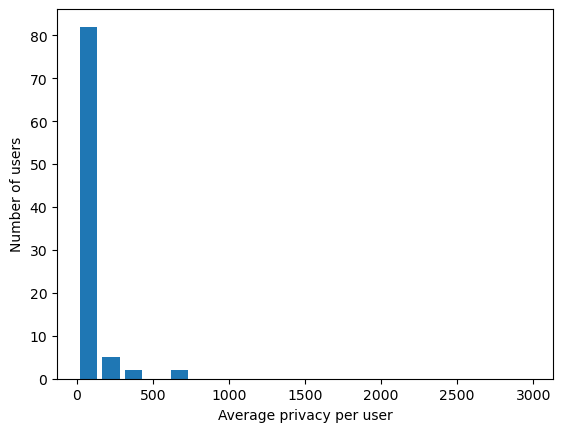

In [9]:
plt.figure()
plt.hist(means_real_priv_user,bins=np.arange(0,3001,150),rwidth=0.75)
plt.xlabel('Average privacy per user')
plt.ylabel('Number of users')
tikzplotlib.save(GeoI_path + 'Real_priv_hist.tex')
plt.show()

### Plotting and statistics

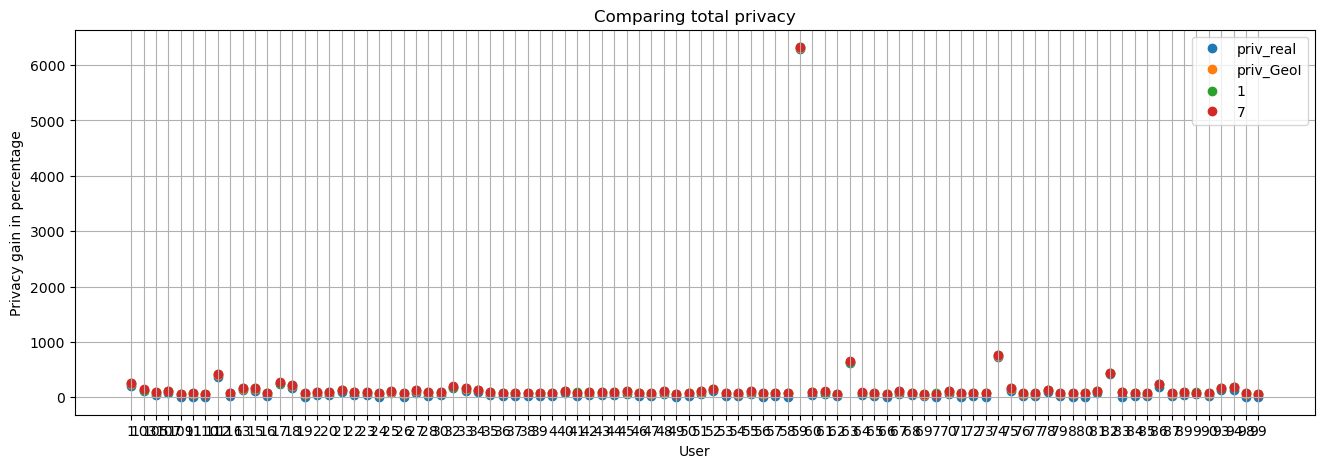

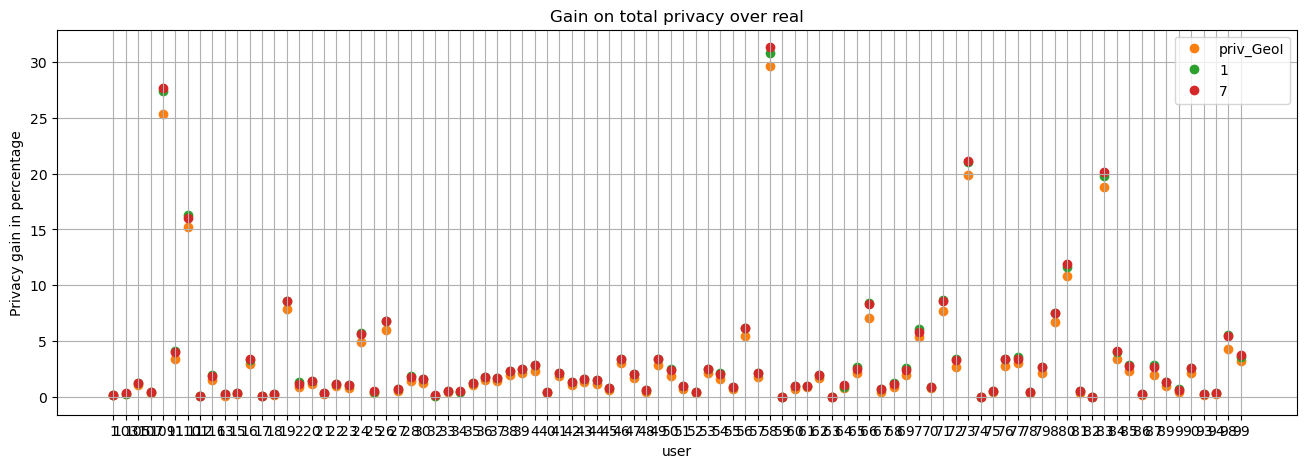

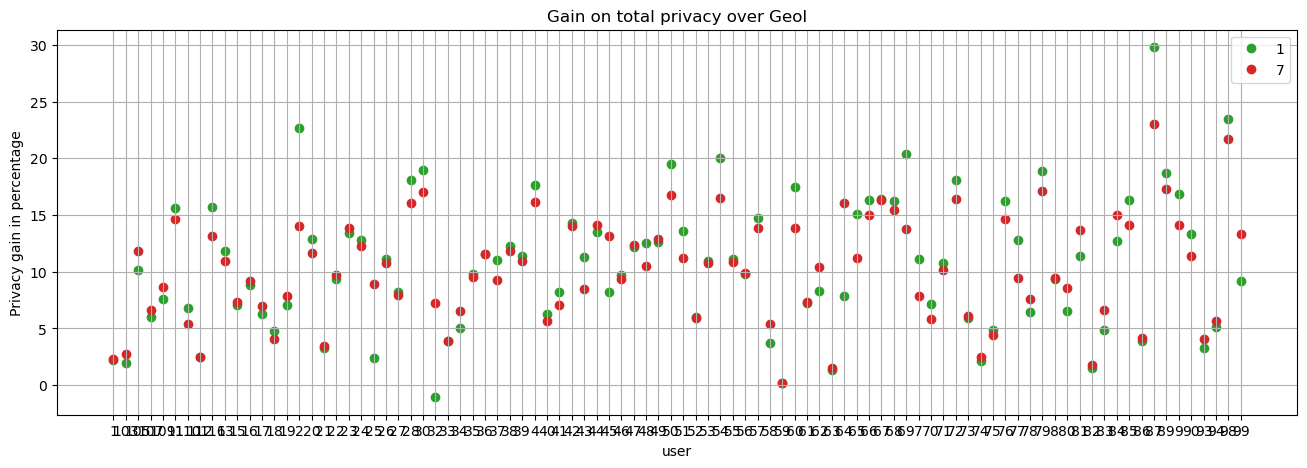

In [10]:
#the purpose of this cell is to plot privacy using all methods for each user 
## Create a color palette for each unique variable in order to show them as the same across each plotted set
num = len(horizons)+2
color_palette = plt.cm.get_cmap('tab10', num)
fig = plt.figure(figsize=(16, 5))
horizon_1=1
horizon_2=7
# Plotting

legend_handles = []
legend_labels = []


for i in priv_user:  #looping on all the solutions stored in priv_user
    c = 0
    for n in means_priv_user[i].index:
        #if (n != 'b') & (n != 'disc_time'): 
        if (n=='priv_real') | (n=='priv_GeoI') | (n==horizon_1) | (n==horizon_2):   
            plt.scatter(i,means_priv_user[i][n] ,color = color_palette(c))
            if i == users[0].replace('.csv',''):  #in order to do the legends only once 
                legend_handles.append(plt.Line2D([], [], marker='o', color=color_palette(c), linestyle='None'))
                legend_labels.append(n)
            c += 1
                
plt.legend(legend_handles, legend_labels)

plt.xlabel("User")
plt.ylabel("Privacy gain in percentage")
plt.grid(True)
plt.title('Comparing total privacy')
tikzplotlib.save(current_path + '\\'+file_case+'\\Total_priv_comp_users.tex')
plt.show()


# Gain over real privacy
fig = plt.figure(figsize=(16, 5))

legend_handles = []
legend_labels = []
for i in priv_user:  #looping on all the solutions stored in priv_user
    c = 1
    for n in means_priv_user[i].index:
        #if (n != 'b') & (n!='priv_real') & (n != 'disc_time'):
        if (n=='priv_GeoI') | (n==horizon_1) | (n==horizon_2):
            plt.scatter(i,(means_priv_user[i][n]-means_priv_user[i]['priv_real'])/means_priv_user[i]['priv_real'] ,color = color_palette(c))
            if i == users[0].replace('.csv',''):  #in order to do the legends only once 
                legend_handles.append(plt.Line2D([], [], marker='o', color=color_palette(c), linestyle='None'))
                legend_labels.append(n)
            c += 1
                
plt.legend(legend_handles, legend_labels)

plt.xlabel("user")
plt.ylabel("Privacy gain in percentage")
plt.grid(True)
plt.title('Gain on total privacy over real')
tikzplotlib.save(current_path + '\\'+file_case+'\\Total_priv_oreal_comp_users.tex')
plt.show()


# Gain over geoI
fig = plt.figure(figsize=(16, 5))

legend_handles = []
legend_labels = []
for i in priv_user:  #looping on all the solutions stored in priv_user
    c = 2
    for n in means_priv_user[i].index:
        #if (n != 'b') & (n!='priv_GeoI') & (n!='priv_real') & (n != 'disc_time'): 
        if (n==horizon_1) | (n==horizon_2):
            plt.scatter(i,100*(means_priv_user[i][n]-means_priv_user[i]['priv_GeoI'])/means_priv_user[i]['priv_GeoI'] ,color = color_palette(c))
            if i == users[0].replace('.csv',''):  #in order to do the legends only once 
                legend_handles.append(plt.Line2D([], [], marker='o', color=color_palette(c), linestyle='None'))
                legend_labels.append(n)
            c += 1
                
plt.legend(legend_handles, legend_labels)

plt.xlabel("user")
plt.ylabel("Privacy gain in percentage")
plt.grid(True)
plt.title('Gain on total privacy over GeoI')
tikzplotlib.save(current_path + '\\'+file_case+'\\Total_priv_oGeoI_comp_users.tex')
plt.show()

# Average Percentage Calculation

### Percentage improvement calculation for each point

The difference with means_priv_user is that now we compute the percentage of gain at each time and then we take the average. In means_priv_user the average of privacy over the time is computed first and then the percentage of gain.

In [11]:
per_imp = {} #percentage improvement over real privacy of privacy calculated through variable utility 
per_imp_obf = {} #percentage improvement over Geo-I privacy of privacy calculated through variable utility 

#per_imp[i][h] vector of improvemments at each time for user i at horizon h
min_priv_to_compare=1
for i in users:
    i=i.replace('.csv','')
    if i in priv_user: #looping over users (i->user)
        per_imp[i]         = pd.DataFrame()
        per_imp_obf[i]     = pd.DataFrame()

        
        for h in horizons+['priv_GeoI']: #looping over(h->horizons)
            per_imp[i][h]= (priv_user[i][h].loc[(np.all([priv_user[i]['priv_real'] > min_priv_to_compare,priv_user[i]['priv_GeoI'] > min_priv_to_compare, priv_user[i]['b'] == 1], axis=0))] -priv_user[i]['priv_real'].loc[(np.all([priv_user[i]['priv_real'] > min_priv_to_compare, priv_user[i]['priv_GeoI'] > min_priv_to_compare,priv_user[i]['b'] == 1], axis=0))])/priv_user[i]['priv_real'].loc[(np.all([priv_user[i]['priv_real'] > min_priv_to_compare, priv_user[i]['priv_GeoI'] > min_priv_to_compare, priv_user[i]['b'] == 1], axis=0))]*100     
            if h!= 'priv_GeoI':
                per_imp_obf[i][h]= (priv_user[i][h].loc[(np.all([priv_user[i]['priv_GeoI'] > min_priv_to_compare, priv_user[i]['priv_real'] > min_priv_to_compare, priv_user[i]['b'] == 1], axis=0))] - priv_user[i]['priv_GeoI'].loc[ (np.all([priv_user[i]['priv_GeoI'] > min_priv_to_compare, priv_user[i]['priv_real'] > min_priv_to_compare, priv_user[i]['b'] == 1], axis=0))])/priv_user[i]['priv_GeoI'].loc[(np.all([priv_user[i]['priv_GeoI'] > min_priv_to_compare, priv_user[i]['priv_real'] > min_priv_to_compare, priv_user[i]['b'] == 1], axis=0))]*100 
                    



 using .loc[(np.all([priv_user[i]['priv_real'] > 0.1, priv_user[i]['b'] == 1], axis=0))] to avoid 0 and extremely low values in addition to take only the points which are being transmitted
 

### calculating percentage improvement for all solutions concatenated in df

In [12]:
per_imp_total = pd.DataFrame() #improving at each iteration
per_imp_total_obf = pd.DataFrame()

min_priv_to_compare=1

for h in df.columns:
    if h != 'priv_real' and h != 'b':
        per_imp_total[h] = (df[h].loc[np.all([df['priv_real'] > min_priv_to_compare, df['priv_GeoI'] > min_priv_to_compare, df['b'] == 1], axis=0)]-df['priv_real'].loc[(np.all([df['priv_real'] > min_priv_to_compare, df['priv_GeoI'] > min_priv_to_compare, df['b'] == 1], axis=0))])/df['priv_real'].loc[(np.all([df['priv_real'] > min_priv_to_compare, df['priv_GeoI'] > min_priv_to_compare,df['b'] == 1], axis=0))]*100
        
        if h != 'priv_GeoI':
            per_imp_total_obf[h] = (df[h].loc[np.all([df['priv_GeoI'] > min_priv_to_compare, df['priv_real'] > min_priv_to_compare,df['b'] == 1], axis=0)]-df['priv_GeoI'].loc[(np.all([df['priv_GeoI'] > min_priv_to_compare, df['priv_real'] > min_priv_to_compare,df['b'] == 1], axis=0))])/df['priv_GeoI'].loc[(np.all([df['priv_GeoI'] > min_priv_to_compare, df['priv_real'] > min_priv_to_compare,df['b'] == 1], axis=0))]*100
                        
per_imp_total.to_csv(current_path + '\\'+file_case+'\\punctual_gain_oreal.csv')
per_imp_total_obf.to_csv(current_path + '\\'+file_case+'\\punctual_gain_GeoI.csv')

## histogram improvements

56


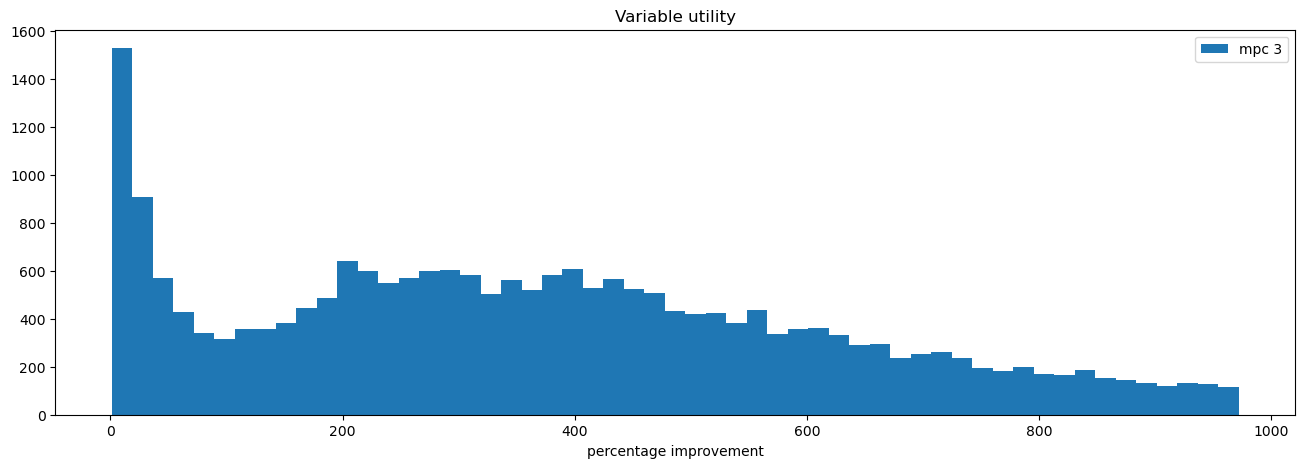

In [13]:
hor=3
q_low_h = per_imp_total[hor].quantile(0.025)
q_hi_h  = per_imp_total[hor].quantile(0.88)

per = pd.DataFrame(per_imp_total)
fig = plt.figure(figsize=(16, 5))
plt.title('Variable utility')
to_hist=per_imp_total[hor].loc[np.all([per_imp_total[hor]>q_low_h,per_imp_total[hor]<q_hi_h],axis=0)]
Nbins=int(2*len(to_hist)**(1/3))
print(Nbins)
bins = np.linspace(int(q_low_h), int(q_hi_h), Nbins)
plt.hist(to_hist, bins, alpha=1, label='mpc '+str(hor))
#bins2 = np.linspace(np.min(per_imp_total[2]), 750, 50)
#plt.hist(per_imp_total[2], bins2, alpha=0.2, label='mpc 2')
#bins3 = np.linspace(np.min(per_imp_total['priv_GeoI']), 50, 20)
#plt.hist(per_imp_total['priv_GeoI'], bins3, alpha=0.4, label='obf')
plt.xlabel('percentage improvement')
plt.legend()
plt.show()

In [14]:
q_hi_h

972.7083642024211

58


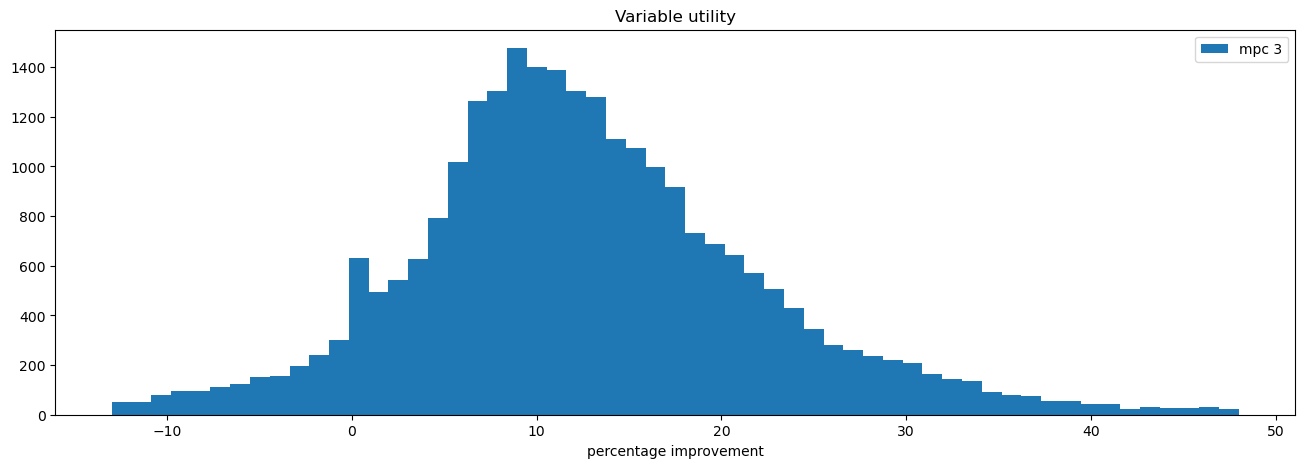

In [15]:
hor=3
q_low_h = per_imp_total_obf[hor].quantile(0.01)
q_hi_h  = per_imp_total_obf[hor].quantile(0.99)

per = pd.DataFrame(per_imp_total)
fig = plt.figure(figsize=(16, 5))
plt.title('Variable utility')
to_hist=per_imp_total_obf[hor].loc[np.all([per_imp_total_obf[hor]>q_low_h,per_imp_total_obf[hor]<q_hi_h],axis=0)]
Nbins=int(2*len(to_hist)**(1/3))
print(Nbins)
bins = np.linspace(int(q_low_h), int(q_hi_h) ,Nbins)
#bins = np.linspace(-10, 30 ,Nbins)
plt.hist(to_hist, bins, alpha=1, label='mpc '+str(hor))
#bins2 = np.linspace(np.min(per_imp_total[2]), 750, 50)
#plt.hist(per_imp_total[2], bins2, alpha=0.2, label='mpc 2')
#bins3 = np.linspace(np.min(per_imp_total['priv_GeoI']), 50, 20)
#plt.hist(per_imp_total['priv_GeoI'], bins3, alpha=0.4, label='obf')
plt.xlabel('percentage improvement')
plt.legend()

### calculating the mean of the percentage

In [16]:
mean_gain_user = {}
mean_gain_user_obf = {}

p1=75
p2=25
for i in per_imp.keys(): #user
    mean_gain_user[i] = {'mean':pd.DataFrame(),str(p1):pd.DataFrame(),str(p2):pd.DataFrame()}
    mean_gain_user_obf[i] = {'mean':pd.DataFrame(),str(p1):pd.DataFrame(),str(p2):pd.DataFrame()}
   
    for j in per_imp[i].columns: #horizon
        #print(j)
        mean_gain_user[i]['mean'][j]     = [np.mean(per_imp[i][j])]
        mean_gain_user[i][str(p1)][j]      = [np.quantile(per_imp[i][j],p1/100)]
        mean_gain_user[i][str(p2)][j]       = [np.quantile(per_imp[i][j],p2/100)]
        if j != 'priv_GeoI':
            mean_gain_user_obf[i]['mean'][j]     = [np.mean(per_imp_obf[i][j][per_imp_obf[i][j]<np.inf])]
            mean_gain_user_obf[i][str(p1)][j]      = [np.quantile(per_imp_obf[i][j][per_imp_obf[i][j]<np.inf],p1/100)]
            mean_gain_user_obf[i][str(p2)][j]       = [np.quantile(per_imp_obf[i][j][per_imp_obf[i][j]<np.inf],p2/100)]


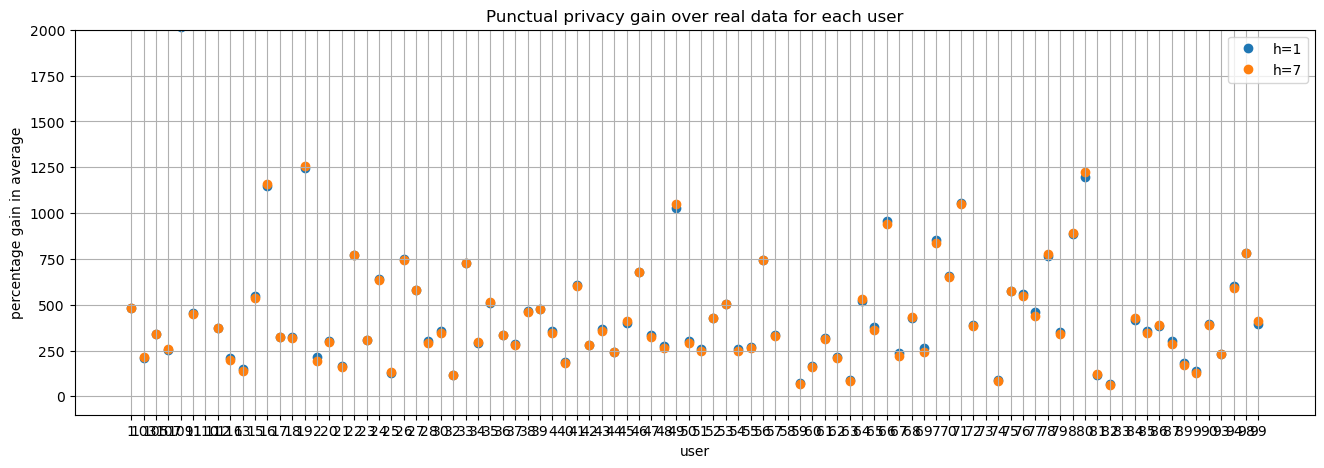

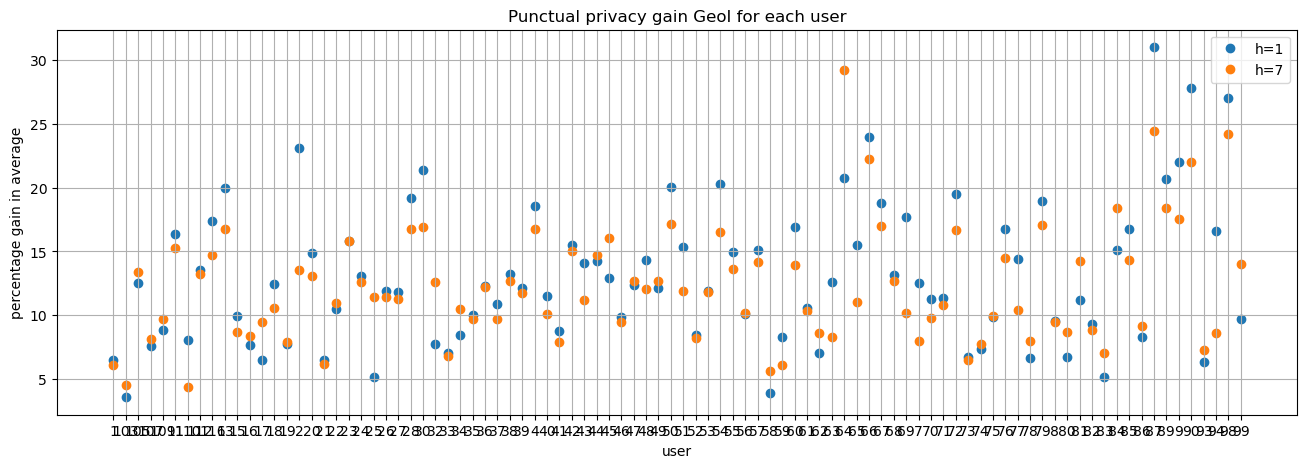

In [17]:
num = len(horizons)+1
color_palette = plt.cm.get_cmap('tab20', num)
fig = plt.figure(figsize=(16, 5))
# Plotting

legend_handles = []
legend_labels = []
for i in per_imp.keys():  #looping on all the solutions stored in priv_user
    c = 0
    for j in per_imp[i].columns:
        if ((j==horizon_1)|(j==horizon_2)): 
            plt.scatter(i,mean_gain_user[i]['mean'][j] ,color = color_palette(c))
            if i == users[0].replace('.csv',''):  #in order to do the legends only once 
                legend_handles.append(plt.Line2D([], [], marker='o', color=color_palette(c), linestyle='None'))
                legend_labels.append('h='+str(j))
            c += 1
plt.ylim([-100,2000])                
plt.legend(legend_handles, legend_labels)



plt.xlabel("user")
plt.ylabel("percentage gain in average")
plt.grid(True)
plt.title('Punctual privacy gain over real data for each user')
tikzplotlib.save(current_path + '\\'+file_case+'\\Punctual_priv_oreal_comp_users.tex')
plt.show()

# over geoI
fig = plt.figure(figsize=(16, 5))
legend_handles = []
legend_labels = []
for i in per_imp.keys():  #looping on all the solutions stored in priv_user
    c = 0
    for j in per_imp[i].columns:
        if  (j!='priv_GeoI') & (j!='disc_time') &((j==horizon_1)|(j==horizon_2)): 
            plt.scatter(i,mean_gain_user_obf[i]['mean'][j] ,color = color_palette(c))
            if i == users[0].replace('.csv',''):  #in order to do the legends only once 
                legend_handles.append(plt.Line2D([], [], marker='o', color=color_palette(c), linestyle='None'))
                legend_labels.append('h='+str(j))
            c += 1
                
plt.legend(legend_handles, legend_labels)

plt.xlabel("user")
plt.ylabel("percentage gain in average")
plt.grid(True)
plt.title('Punctual privacy gain GeoI for each user')
tikzplotlib.save(current_path + '\\'+file_case+'\\Punctual_priv_oGeoI_comp_users.tex')
plt.show()



10


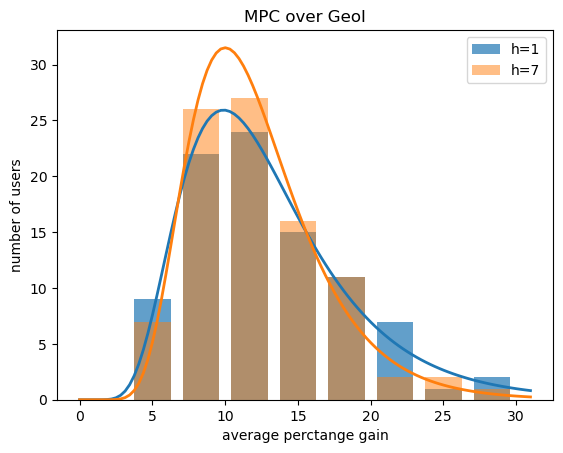

8


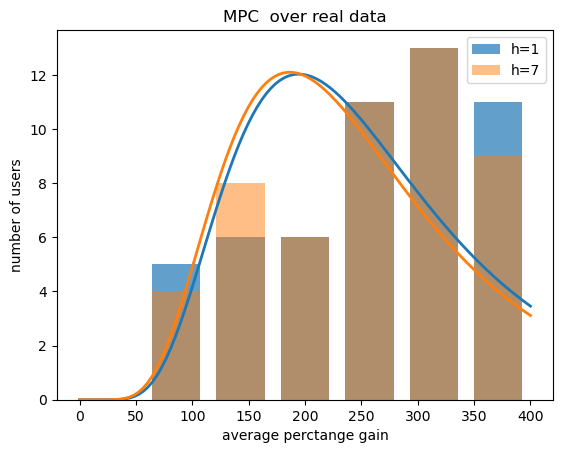

In [18]:
dist_ogeoi1=np.array([mean_gain_user_obf[i]['mean'][horizon_1][0] for i in per_imp.keys()])
mu1=np.mean(np.log(dist_ogeoi1[dist_ogeoi1>0]))
s1 =np.std(np.log(dist_ogeoi1[dist_ogeoi1>0]))
l1 =len(dist_ogeoi1[dist_ogeoi1>0])
min_dist1=min([0,min(dist_ogeoi1)])
max_dist1=max(dist_ogeoi1)
mu1_sh=np.mean(np.log(dist_ogeoi1[dist_ogeoi1>min_dist1]-min_dist1))
s1_sh=np.std(np.log(dist_ogeoi1[dist_ogeoi1>min_dist1]-min_dist1))
l1_sh=len(dist_ogeoi1[dist_ogeoi1>min_dist1])

dist_ogeoi2=np.array([mean_gain_user_obf[i]['mean'][horizon_2][0] for i in per_imp.keys()])
mu2=np.mean(np.log(dist_ogeoi2[dist_ogeoi2>0]))
s2 =np.std(np.log(dist_ogeoi2[dist_ogeoi2>0]))
l2 =len(dist_ogeoi2)
min_dist2=min([0,min(dist_ogeoi2)])
mu2_sh=np.mean(np.log(dist_ogeoi2[dist_ogeoi2>min_dist2]-min_dist2))
s2_sh=np.std(np.log(dist_ogeoi2[dist_ogeoi2>min_dist2]-min_dist2))
l2_sh=len(dist_ogeoi2[dist_ogeoi1>min_dist2])

Nbins=int(2*(l1_sh)**(1/3))+1
print(Nbins)
bins=np.linspace(int(min_dist1),int(max_dist1),Nbins)
step=bins[1]-bins[0]
x1=np.linspace(min_dist1,max_dist1,100)


plt.figure()
plt.title('MPC over GeoI')
plt.hist(dist_ogeoi1,bins=bins,rwidth=0.75,alpha=0.7,label='h='+str(horizon_1),color='tab:blue')
plt.plot(x1,l1_sh*step*stats.lognorm.pdf(x1,s1_sh,loc=min_dist1,scale=np.exp(mu1_sh)),color='tab:blue',linewidth=2)
plt.hist(dist_ogeoi2,bins=bins,rwidth=0.75,alpha=0.5,label='h='+str(horizon_2),color='tab:orange')
plt.plot(x1,l2_sh*step*stats.lognorm.pdf(x1,s2_sh,loc=min_dist2,scale=np.exp(mu2_sh)),color='tab:orange',linewidth=2)
plt.xlabel('average perctange gain')
plt.ylabel('number of users')
plt.legend()
tikzplotlib.save(current_path + '\\'+file_case+'\\hist_priv_oGeoI_users.tex')

plt.show()
max_toshow=400
dist_oreal1=np.array([mean_gain_user[i]['mean'][horizon_1][0] for i in per_imp.keys()])
dist_oreal1=dist_oreal1[dist_oreal1<max_toshow]
mu1b=np.mean(np.log(dist_oreal1))
s1b=np.std(np.log(dist_oreal1))
l1b=len(dist_oreal1)

dist_oreal2=np.array([mean_gain_user[i]['mean'][horizon_2][0] for i in per_imp.keys()])
dist_oreal2=dist_oreal2[dist_oreal2<max_toshow]
mu2b=np.mean(np.log(dist_oreal2))
s2b =np.std(np.log(dist_oreal2))
l2b =len(dist_oreal2)

Nbins=int(2*(l1b)**(1/3))+1
print(Nbins)
bins=np.linspace(0,max_toshow,Nbins)
step=bins[1]-bins[0]
xb=np.linspace(0,max_toshow,100)


plt.figure()
plt.title('MPC  over real data')
plt.hist(dist_oreal1,bins=bins,rwidth=0.75,alpha=0.7,label='h='+str(horizon_1),color='tab:blue')
plt.plot(xb,l1b*step*stats.lognorm.pdf(xb,s1b,scale=np.exp(mu1b)),color='tab:blue',linewidth=2)
plt.hist(dist_oreal2,bins=bins,rwidth=0.75,alpha=0.5,label='h='+str(horizon_2),color='tab:orange')
plt.plot(xb,l2b*step*stats.lognorm.pdf(xb,s2b,scale=np.exp(mu2b)),color='tab:orange',linewidth=2)
plt.legend()
plt.xlabel('average perctange gain')
plt.ylabel('number of users')
tikzplotlib.save(current_path + '\\'+file_case+'\\hist_priv_oreal_users.tex')
plt.show()

### Plotting

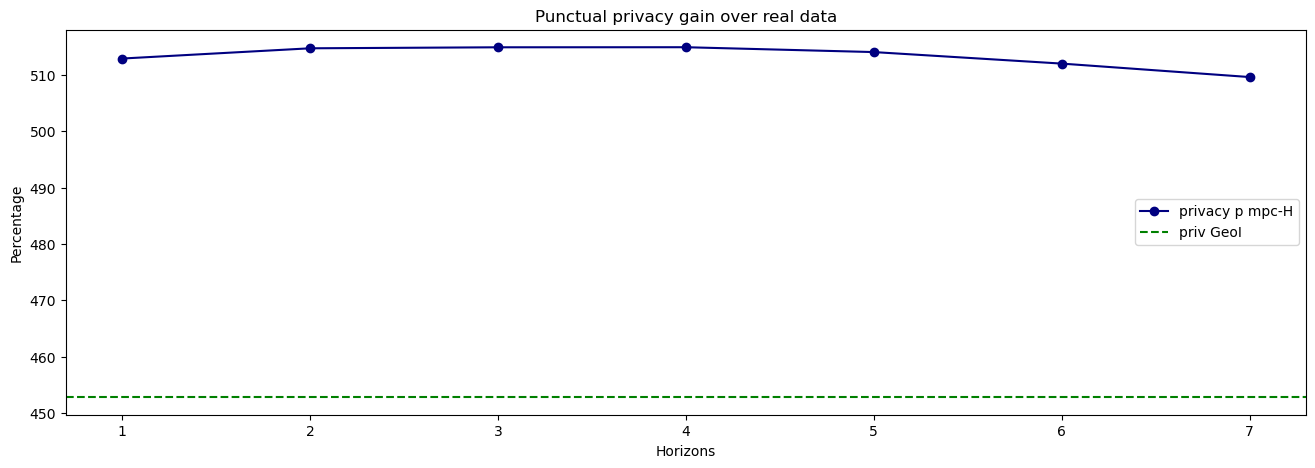

In [19]:
ch = 'all' #'all' if all users else write user number

fig = plt.figure(figsize=(16, 5))
if ch == 'all': 
    plt.plot(np.array(horizons), [per_imp_total[h].mean() for h in horizons], "o-", color= 'navy' ,label='privacy p mpc-H')
    plt.axhline(per_imp_total['priv_GeoI'].mean(), color='green', linestyle='--', label='priv GeoI')
    #plt.plot(np.array(horizons), [per_imp_total[h].quantile(p1/100) for h in horizons], "--", color= 'red')
    #plt.plot(np.array(horizons), [per_imp_total[h].quantile(p2/100) for h in horizons], "--", color= 'red')
    plt.xlabel('Horizons')
    plt.ylabel('Percentage')
    plt.title('Punctual privacy gain over real data')
    plt.legend()
    tikzplotlib.save(current_path + '\\'+file_case+'\\Punctual_priv_oreal.tex')
else: 
    plt.plot(np.array(horizons), [mean_gain_user[ch]['mean'][h] for h in horizons], "o-", color= 'navy' ,label='privacy p mpc-H')
    #plt.plot(np.array(horizons), [mean_gain_user[ch][str(p1)][h] for h in horizons], "--", color= 'red' ,label='privacy p mpc-H using variable utility')
    #plt.plot(np.array(horizons), [mean_gain_user[ch][str(p2)][h] for h in horizons], "--", color= 'red' ,label='privacy p mpc-H using variable utility')
    plt.axhline(mean_gain_user[ch]['mean']['priv_GeoI'].mean(), color='green', linestyle='--', label='priv GeoI')
    plt.xlabel('Horizons')
    plt.ylabel('Punctual privacy gain over real data')
    plt.title('Privacy Gain over real one user: ' + str(ch))
    plt.legend()
    


In [20]:
np.savetxt(current_path + '\\'+file_case+'\\gain_h_real.txt',[per_imp_total[h].mean() for h in horizons])

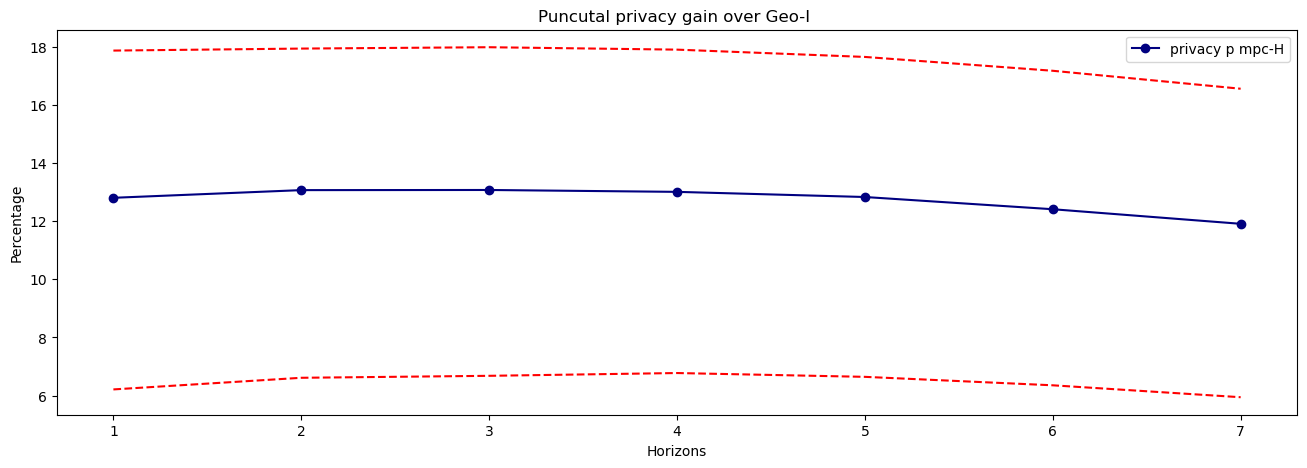

In [21]:
ch ='all' #'all' if all users else write user
p1=25
p2=75
fig = plt.figure(figsize=(16, 5))
plt.title('gain over GeoI')
if ch == 'all': 
    plt.plot(np.array(horizons), [per_imp_total_obf[h][per_imp_total_obf[h]<np.inf].mean() for h in horizons], "o-", color= 'navy' ,label='privacy p mpc-H')
    plt.plot(np.array(horizons), [per_imp_total_obf[h][per_imp_total_obf[h]<np.inf].quantile(p1/100) for h in horizons], "--", color= 'red' )
    plt.plot(np.array(horizons), [per_imp_total_obf[h][per_imp_total_obf[h]<np.inf].quantile(p2/100) for h in horizons], "--", color= 'red' )
    plt.ylabel('Percentage')
    plt.xlabel('Horizons')
    plt.title('Puncutal privacy gain over Geo-I ')
    plt.legend()
    tikzplotlib.save(current_path + '\\'+file_case+'\\Punctual_priv_oGeoI.tex')
else: 
    plt.plot(np.array(horizons), [mean_gain_user_obf[ch]['mean'][h] for h in horizons], "o-", color= 'navy' ,label='privacy p mpc-H using variable utility')
    plt.ylabel('Percentage')
    plt.xlabel('Horizons')
    plt.title(' Privacy Gain over Geo-I  ')
    plt.legend()


In [22]:
np.savetxt(current_path + '\\'+file_case+'\\gain_h_GeoI.txt',[per_imp_total_obf[h].mean() for h in horizons])

### Privacy for one user 

In [32]:
user ='7'#'abcoij' #"select which user solution is to be drawn"
horizon =  5# "select which horizon is to be drawn"
if user in priv_user:
    Time_plot=priv_user[user].loc[priv_user[user]['b']==1]['disc_time']
    Time_plot2=priv_user[user]['disc_time']
    fig = figure(plot_width=900, plot_height=450)
    #fig.line(Time_plot, priv_user[user].loc[priv_user[user]['b']==1][horizon], line_color='red', legend_label= "p mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    fig.circle(Time_plot, priv_user[user].loc[priv_user[user]['b']==1][horizon], color='red', legend_label= "p mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    #fig.line(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_GeoI'], line_color='orange', legend_label="p Geo-I of" + ' user: ' + str(user))
    fig.circle(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_GeoI'], color='orange', legend_label="p Geo-I of" + ' user: ' + str(user))
    
    #fig.line(Time_plot2, priv_user[user][horizon], line_color='red', legend_label= "p mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    #fig.circle(Time_plot2, priv_user[user][horizon], color='red', legend_label= "p mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    
    #fig.line(Time_plot2, priv_user[user]['priv_GeoI'], line_color='orange', legend_label="p Geo-I of" + ' user: ' + str(user))
    #fig.circle(Time_plot2, priv_user[user]['priv_GeoI'], color='orange', legend_label="p Geo-I of" + ' user: ' + str(user))
    
    #fig.line(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_real'], line_color='black', legend_label="p real of" + ' user: ' + str(user))
    #fig.circle(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_real'], color='black', legend_label="p real of" + ' user: ' + str(user))
    
    
    fig.xaxis.axis_label = "time [s]"
    fig.yaxis.axis_label = "privacy"
    tikzplotlib.save(current_path + '\\'+file_case+'\\priv_user.tex')
    show(fig)
    fig = figure(plot_width=900, plot_height=450)
    #fig.line(Time_plot, util_user[user].loc[priv_user[user]['b']==1][horizon], line_color='red', legend_label= "util mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    
    fig.circle(Time_plot, util_user[user].loc[priv_user[user]['b']==1]['util_GeoI'], color='orange', legend_label="util" + ' user: ' + str(user))
    fig.xaxis.axis_label = "time [s]"
    fig.yaxis.axis_label = "utility loss"
    tikzplotlib.save(current_path + '\\'+file_case+'\\util_user.tex')
    show(fig)
    
else: 
    print('invalid user solution')
    

<Figure size 640x480 with 0 Axes>

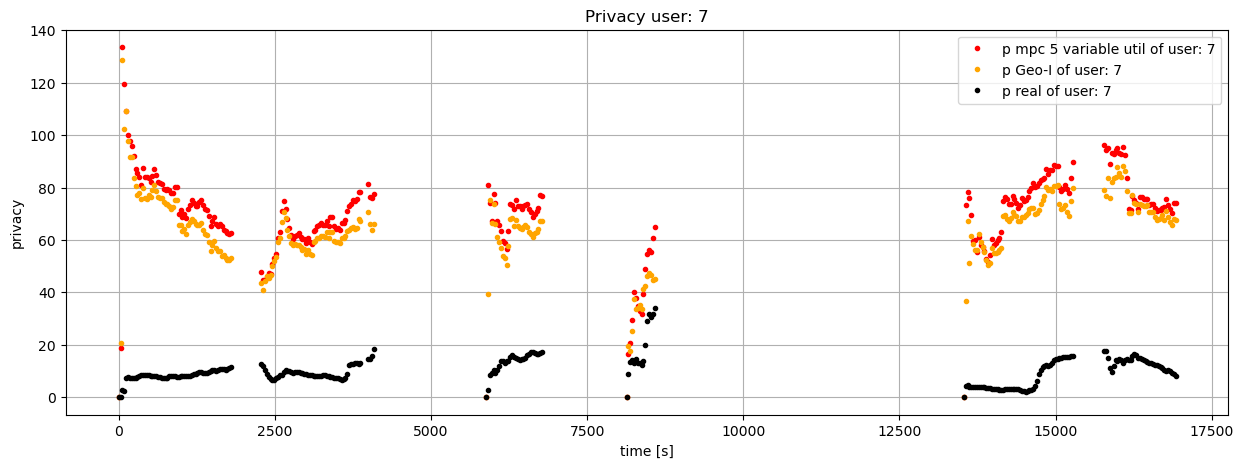

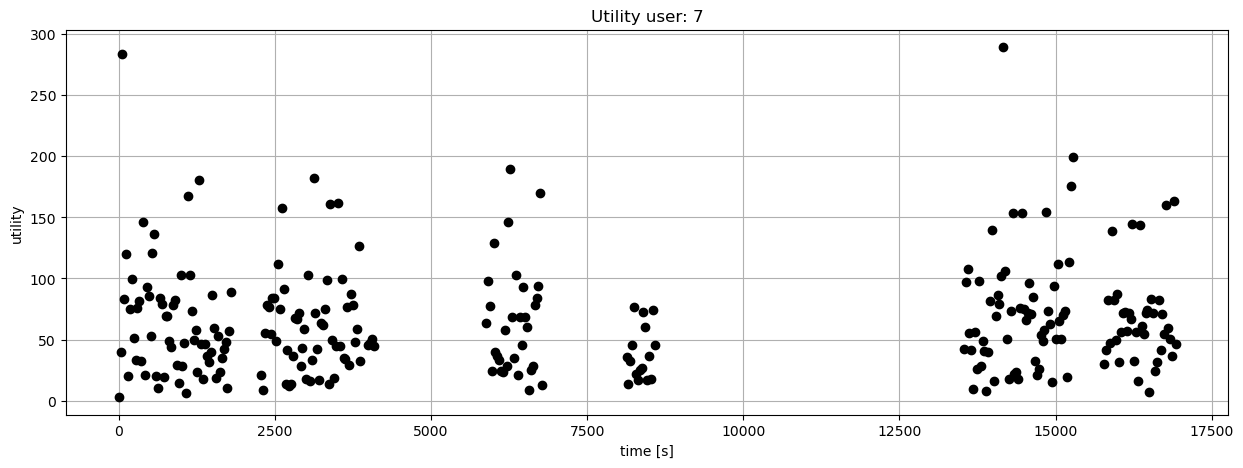

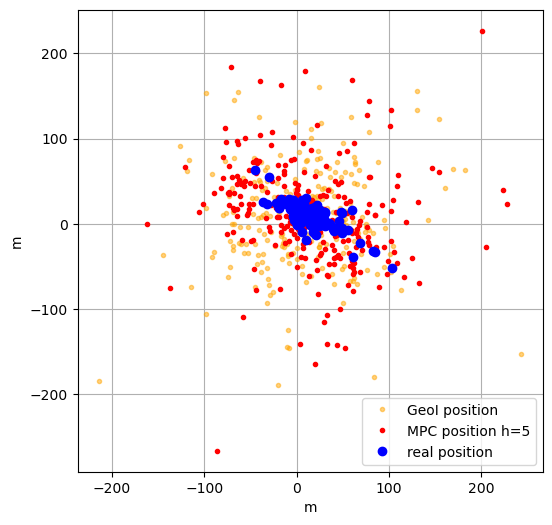

In [33]:
user = '7'#'abboip' #"select which user solution is to be drawn"
horizon =  5# "select which horizon is to be drawn"
if user in priv_user:
    plt.figure(figsize=(15,5))
    Time_plot=priv_user[user].loc[priv_user[user]['b']==1]['disc_time']
    plt.plot(Time_plot, priv_user[user].loc[priv_user[user]['b']==1][horizon], '.',color='red', label= "p mpc " + str(horizon) + ' variable util of' + ' user: ' + str(user))
    plt.plot(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_GeoI'], '.',color='orange', label="p Geo-I of" + ' user: ' + str(user))
    plt.plot(Time_plot, priv_user[user].loc[priv_user[user]['b']==1]['priv_real'], '.',color='black', label="p real of" + ' user: ' + str(user))
    
    #Time_plot2=priv_user[user]['disc_time']
    #plt.plot(Time_plot2, priv_user[user][horizon], 'o-',color='red', label= "mpc h=" + str(horizon))
    #plt.plot(Time_plot2, priv_user[user]['priv_GeoI'], 'o-',color='orange', label="Geo-I")
    #plt.plot(Time_plot2, priv_user[user]['priv_real'], 'o-',color='blue', label="real")
    
    plt.title('Privacy user: ' + str(user))
    plt.xlabel("time [s]")
    plt.ylabel("privacy")
    plt.legend()
    plt.grid()
    tikzplotlib.save(current_path + '\\'+file_case+'\\priv_user_'+str(user)+'.tex')
    plt.show()
    
    ##Util
    plt.figure(figsize=(15,5))
    plt.plot(Time_plot, util_user[user].loc[priv_user[user]['b']==1][horizon],'o', color='black' )
    
    plt.title('Utility user: ' + str(user))
    plt.xlabel("time [s]")
    plt.ylabel("utility")
    #plt.legend()
    plt.grid()
    tikzplotlib.save(current_path + '\\'+file_case+'\\util_user_'+str(user)+'.tex')
    
    plt.show()
    
    ##Trace
    
    plt.figure(figsize=(6,6))
    plt.plot(priv_user[user].loc[priv_user[user]['b']==1]['x_GeoI'],priv_user[user].loc[priv_user[user]['b']==1]['y_GeoI'],'.',color='orange',label='GeoI position',alpha=0.5)
    plt.plot(priv_user[user].loc[priv_user[user]['b']==1]['x_'+str(horizon)],priv_user[user].loc[priv_user[user]['b']==1]['y_'+str(horizon)],'r.',label='MPC position h='+str(horizon))
    plt.plot(priv_user[user].loc[priv_user[user]['b']==1]['x_real'],priv_user[user].loc[priv_user[user]['b']==1]['y_real'],'bo',label='real position')
    plt.xlabel('m')
    plt.ylabel('m')
    plt.grid()
    plt.legend()
    
    tikzplotlib.save(current_path + '\\'+file_case+'\\trace_user_'+str(user)+'.tex')
    plt.show()
else: 
    print('invalid user solution')
    

# Computational time

removing zeros from Time so average would not be affected by non-transmitted values

In [25]:
pickle.dump( Runtime, open( current_path + '\\'+file_case+'\\Run_times.pkl', "wb" ) ) 

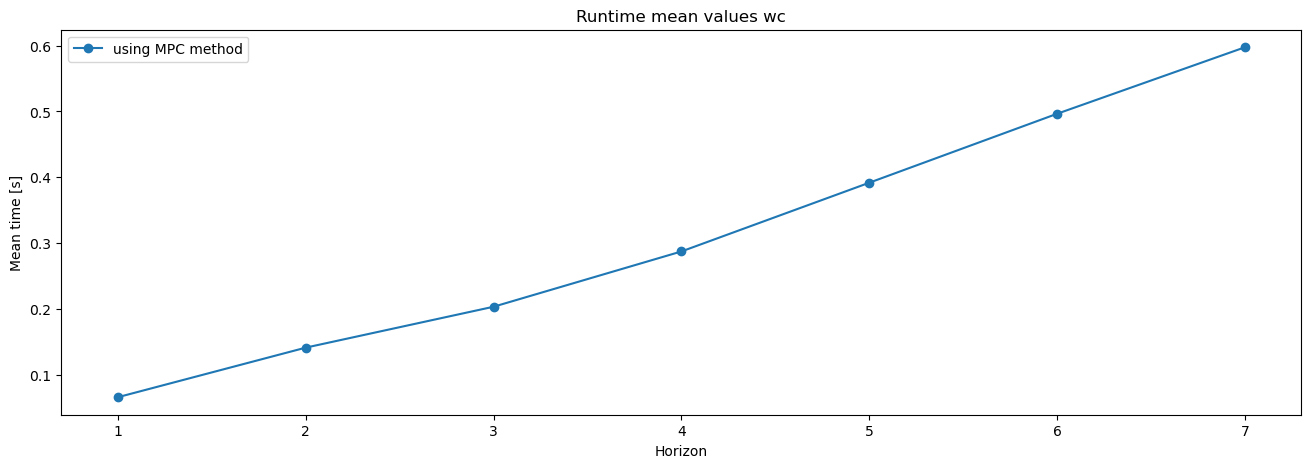

In [26]:
fig1 = plt.figure(figsize=(16, 5))
time_plot=[]
for i in horizons:
    x=np.array(Runtime[i])
    time_plot+=[np.mean(x[x>0])]

plt.plot(horizons,time_plot,'o-',label='using MPC method')
plt.xlabel('Horizon')
plt.ylabel('Mean time [s]')
plt.legend()
tikzplotlib.save(current_path + '\\'+file_case+'\\runtimes.tex')
plt.title('Runtime mean values wc')

np.savetxt(current_path + '\\'+file_case+'\\time_h.txt',time_plot)

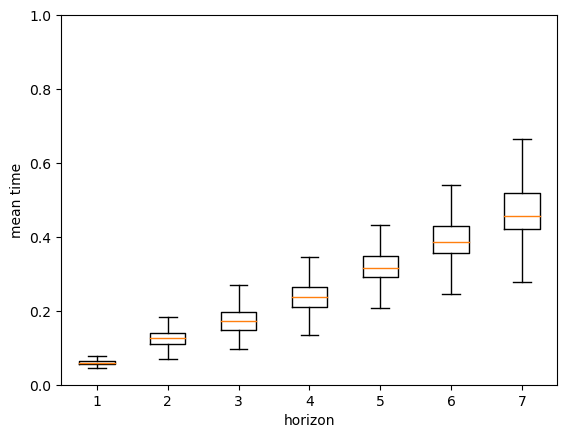

In [27]:

time_plot=[]
time_plot2=[]
for i in horizons:
    x=np.array(Runtime[i])
    time_plot_sub=[x[x>0]]
    time_plot+=time_plot_sub
    time_plot2_sub=[x]
    time_plot2+=time_plot2_sub
plt.plot()
plt.boxplot(time_plot,showfliers=False)
plt.ylim([0,1])
plt.xlabel('horizon')
plt.ylabel('mean time')
#plt.boxplot(time_plot2,showfliers=False)
#plt.boxplot(time_plot2,'b',showfliers=False)
tikzplotlib.save(current_path + '\\'+file_case+'\\runtimes.tex')
plt.show()